TODO:

Plot each variable vs target and see if they're linearly separable in the graph

OrdinalEncoding for cabins, embarked

dummy classifier and compare

hyperparameter tuning

cross_validation

balancing survivors (there are a lot more people who didn't survive, that affects the metrics)

changing probability threshold (instead of giving "Survived" at prob>=0.5, change that)



In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, jaccard_score, f1_score, log_loss

%matplotlib inline

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


ValueError: could not convert string to float: 'C85'

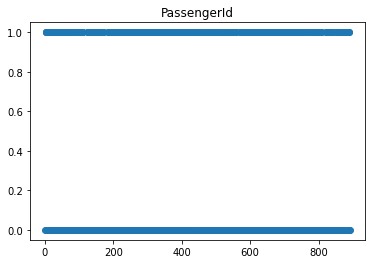

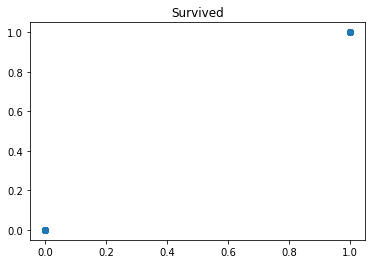

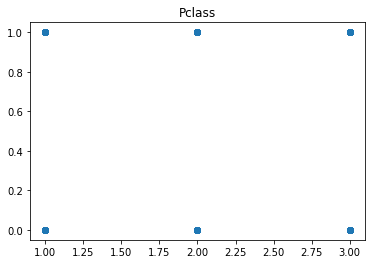

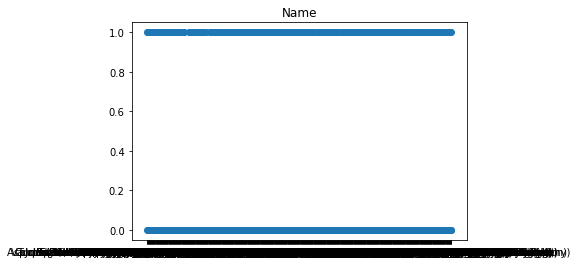

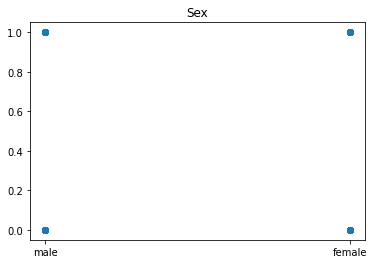

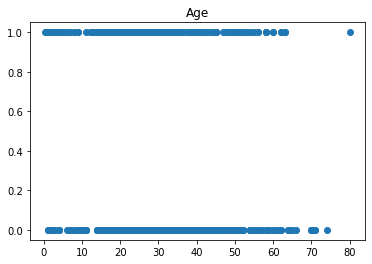

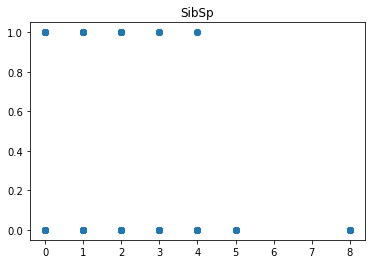

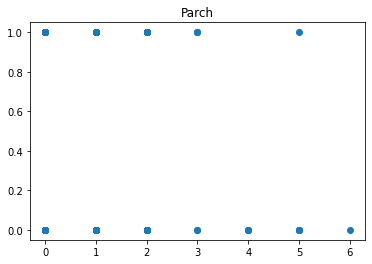

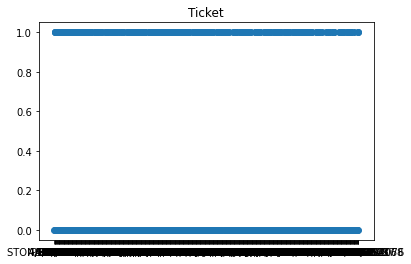

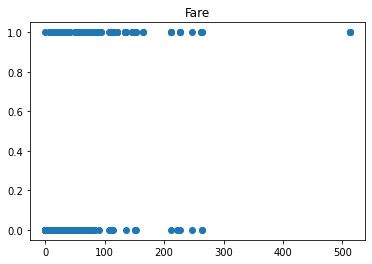

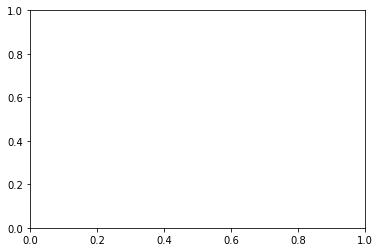

In [2]:
#Get and plot train Values
passengers = pd.read_csv('/kaggle/input/titanic/train.csv')
passengers.head()
for column in passengers.columns:
    plt.figure()
    plt.scatter(passengers[column],passengers["Survived"])
    plt.title(column)

In [ ]:
#Process train Values
passengers = pd.read_csv('/kaggle/input/titanic/train.csv')
#Show number of unique rows for each column
print(passengers.nunique())
print("Number of survivors: \n",passengers["Survived"].value_counts())
#Show if there are Nan values in each column
#print("Nan Values:")
#[print(passengers[column].isna().value_counts())for column in passengers] #This tells us that age, cabin and embarked have Nan Values
#preprocessing the train data
passengers["Cabin"].fillna(value= "NoCabin", inplace= True) #fills NaN in Cabin with "NoCabin" 
passengers["Age"].fillna(value= -1, inplace= True) #fills NaN in Age with -1
passengers["Embarked"].fillna(value= "NoPort", inplace= True)#fills NaN in Age with "NoPort"
passengers.replace(['male','female'],[0,1], inplace= True)
#Drop the result column
passenger_features = passengers.drop(columns=["Survived"], axis=1)
#Separate categorical text values into different columns
processed_passengers = pd.get_dummies(data = passenger_features, columns = ["Ticket","Cabin","Embarked","Name"])

In [ ]:
# Get and Process Test Values
passengers_test = pd.read_csv('/kaggle/input/titanic/test.csv')
#Show number of unique rows for each column
print(passengers_test.nunique())
#preprocessing the test data
passengers_test["Cabin"].fillna(value= "NoCabin", inplace= True) #fills NaN in Cabin with "NoCabin" 
passengers_test["Age"].fillna(value= -1, inplace= True) #fills NaN in Age with -1
passengers_test["Embarked"].fillna(value= "NoPort", inplace= True)#fills NaN in Age with "NoPort"
passengers_test["Fare"].fillna(value= 0, inplace= True)#fills NaN in Fare with 0
passengers_test.replace(['male','female'],[0,1], inplace= True)
processed_test = pd.get_dummies(data = passengers_test, columns = ["Ticket","Cabin","Embarked","Name"])

In [ ]:
#This fills with NA if the column does not exist in the right dataframe
x_train, x_test = processed_passengers.align(processed_test, join = 'left',axis=1)
x_test.fillna(value= 0, inplace= True)

In [ ]:
#Drop the name column as it gives no data (each passenger had their own name, unique to them, redundant with PassengerId)
y_train = passengers["Survived"]
#check the shapes are correct
print(f'Shape of the train set: {x_train.shape} \nShape of the test set: {x_test.shape}')
#check the number of survivors is correct
print(f'Number of survivors: \n{y_train.value_counts()}')

In [ ]:
LogReg = LogisticRegression(solver= 'liblinear')
LogReg.fit(x_train,y_train)

In [ ]:
#Predict
predict = LogReg.predict(x_test)
predictions = pd.DataFrame({'PassengerId':x_test['PassengerId'],'Survived':predict})
predictions.shape

In [ ]:
predictions.to_csv('titanic_submission.csv', index= False)
print("Done")